<a href="https://colab.research.google.com/github/mehulraj19/DV-project/blob/main/DV_fbprohet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Packages

In [2]:
df = pd.read_csv("covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Data Analysis

In [3]:
df1 = df[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered']]

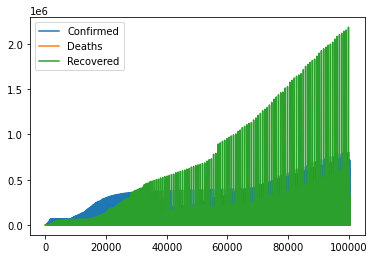

In [4]:
df1.plot()

In [5]:
## prepare the Column names for the columns
df_confirmed = df1[['ObservationDate',  'Confirmed']]
df_confirmed.columns = ['ds', 'y']

df_deaths = df1[['ObservationDate',  'Deaths']]
df_deaths.columns = ['ds', 'y']

df_recovered = df1[['ObservationDate',  'Recovered']]
df_recovered.columns = ['ds', 'y']

In [6]:
df_confirmed.head()

,ds,y
0,01/22/2020,1.0
1,01/22/2020,14.0
2,01/22/2020,6.0
3,01/22/2020,1.0
4,01/22/2020,0.0


In [7]:
df_deaths.head()

,ds,y
0,01/22/2020,0.0
1,01/22/2020,0.0
2,01/22/2020,0.0
3,01/22/2020,0.0
4,01/22/2020,0.0


In [8]:
df_recovered.head()

,ds,y
0,01/22/2020,0.0
1,01/22/2020,0.0
2,01/22/2020,0.0
3,01/22/2020,0.0
4,01/22/2020,0.0


In [9]:
df_confirmed['ds'] = pd.to_datetime(df_confirmed['ds'])
df_deaths['ds'] = pd.to_datetime(df_deaths['ds'])
df_recovered['ds'] = pd.to_datetime(df_recovered['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [10]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100344 entries, 0 to 100343
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      100344 non-null  datetime64[ns]
 1   y       100343 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [11]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100344 entries, 0 to 100343
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      100344 non-null  datetime64[ns]
 1   y       100343 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [12]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100344 entries, 0 to 100343
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      100344 non-null  datetime64[ns]
 1   y       100343 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


## Modelling

In [13]:
## importing fbprophet model
from fbprophet import Prophet

In [14]:
model_confirmed = Prophet()
model_deaths = Prophet()
model_recovered = Prophet()

In [15]:
model_confirmed.fit(df_confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
model_deaths.fit(df_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
model_recovered.fit(df_recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Future Prediction

In [29]:
future = list()
for i in range(1, 12):
  date = '2021-%10d' %i
  future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [36]:
f_confirmed = model_confirmed.predict(future)

In [40]:
f_confirmed1 = f_confirmed[['yhat', 'yhat_upper']]
f_confirmed1

,yhat,yhat_upper
0,76976.165349,142404.558832
1,87725.564264,157294.314329
2,97434.253354,169483.026690
3,108141.924202,179529.397413
4,118628.074954,199128.863828
5,129439.844756,219802.377181
6,139695.163745,242938.766302
7,150552.708743,263034.806223
8,161253.778640,283365.419110
9,171635.883978,310691.156454


In [42]:
f_deaths= model_deaths.predict(future)

In [43]:
f_deaths1 = f_deaths[['yhat', 'yhat_upper']]
f_deaths1

,yhat,yhat_upper
0,2054.362911,5735.344759
1,2282.794391,6270.063754
2,2490.172884,6509.656677
3,2718.355010,7582.308704
4,2945.475639,7846.739927
5,3173.808393,8661.688695
6,3392.335114,9786.841579
7,3627.762177,10808.538388
8,3855.598855,11106.287269
9,4076.303222,12796.482420


In [44]:
f_recovered = model_recovered.predict(future)

In [45]:
f_recovered1 = f_recovered[['yhat', 'yhat_upper']]
f_recovered1

,yhat,yhat_upper
0,57520.261034,116946.496866
1,66310.638480,126718.760320
2,74260.151398,137352.781073
3,83057.893978,145229.428899
4,91607.894613,159609.130203
5,100440.523790,171344.879718
6,108893.810962,177065.256544
7,117722.068749,191040.259716
8,126529.855703,199644.072363
9,135028.011984,209290.520118


## Model Plotting

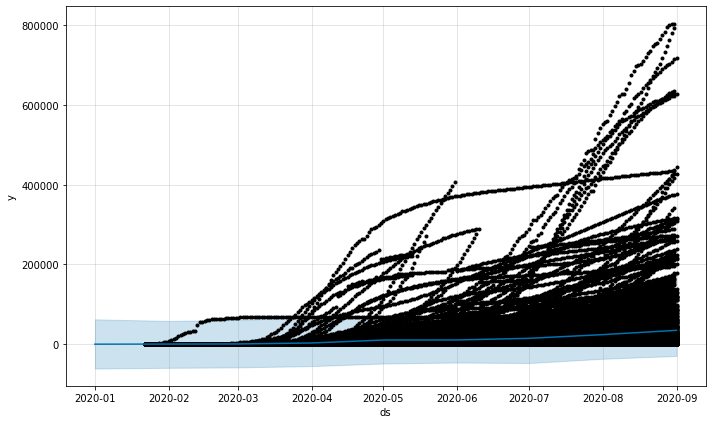

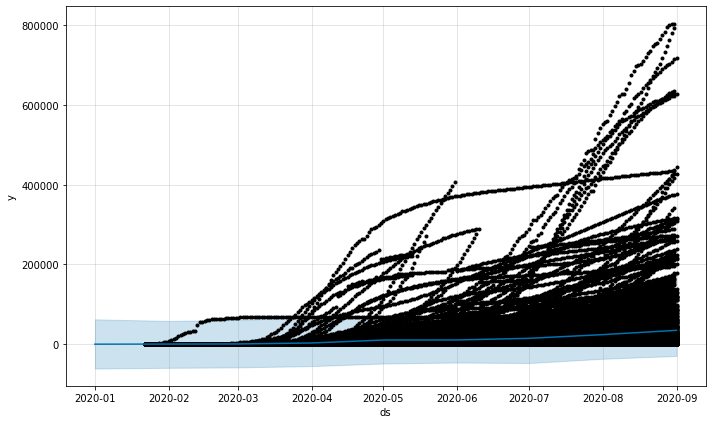

In [ ]:
model_confirmed.plot(f_confirmed)

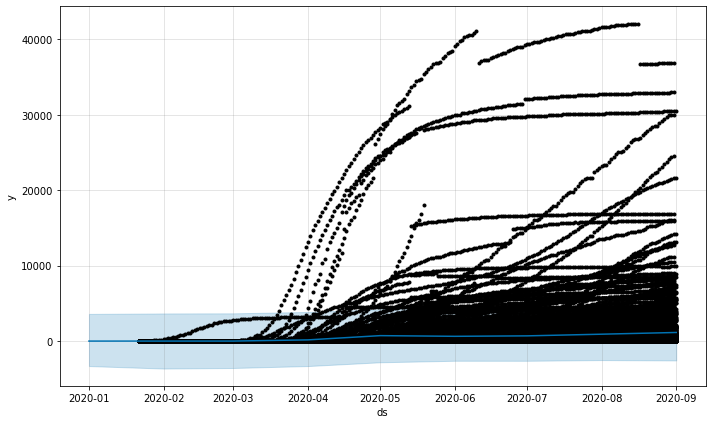

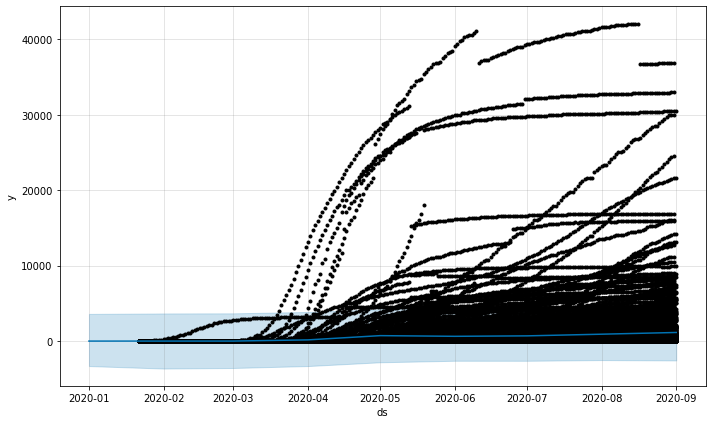

In [ ]:
model_deaths.plot(f_deaths)

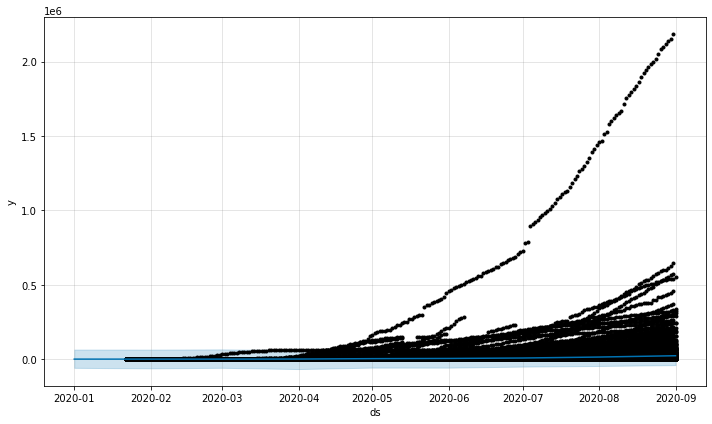

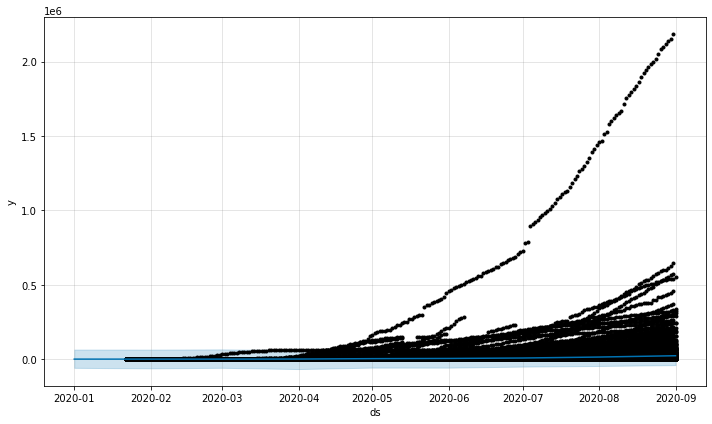

In [ ]:
model_recovered.plot(f_recovered)

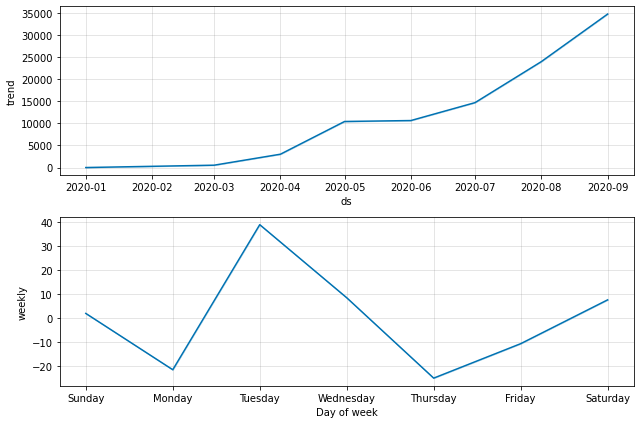

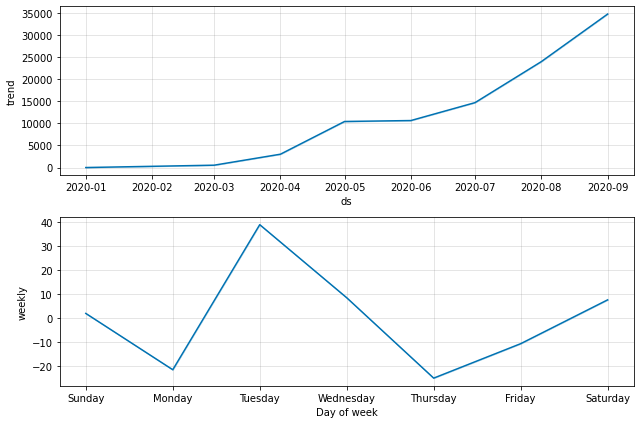

In [ ]:
model_recovered.plot_components(f_confirmed)

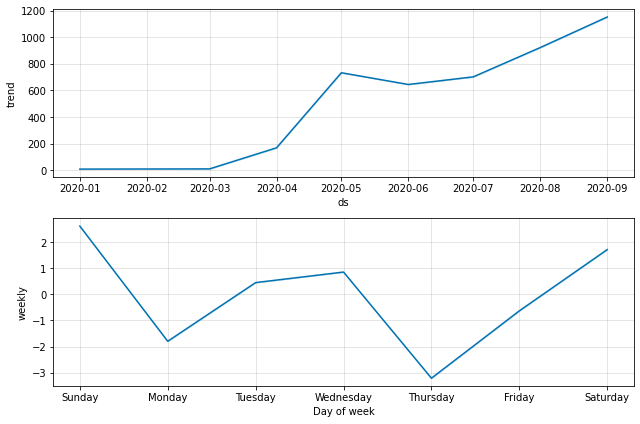

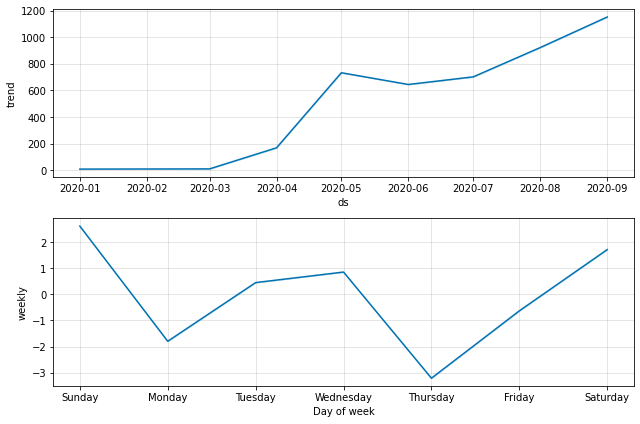

In [ ]:
model_deaths.plot_components(f_deaths)

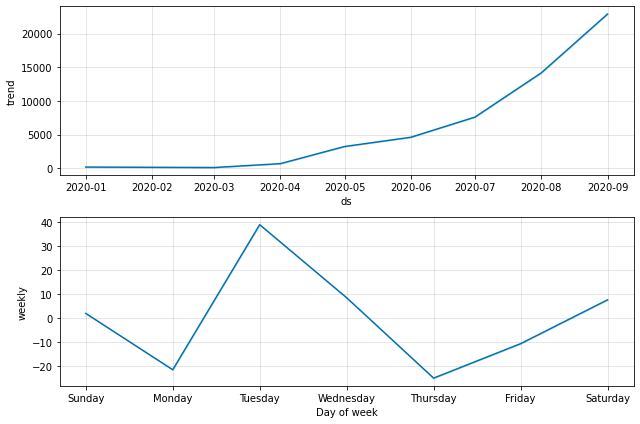

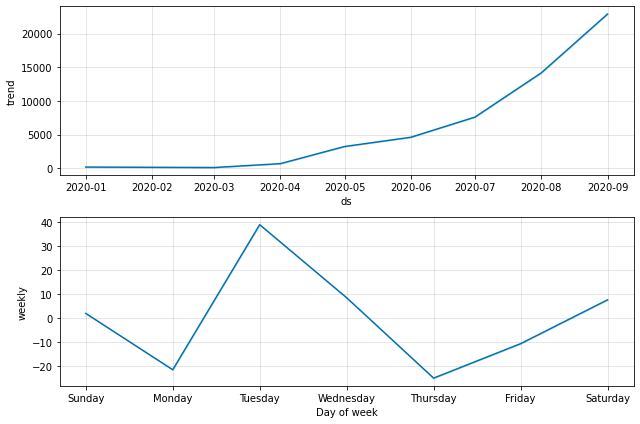

In [ ]:
model_recovered.plot_components(f_recovered)